# Introduction

### Goal
You are working in a retail company, and being asked by your boss to find insight to improve the revenue

From the data we got:
1. Customer demographics
2. Purchasing behaviors

We could answer:
1. We should use skim marketing to increase deal purchases and not affect the total purchases
2. To answer who is the target? to which deal?

# Exploratory Data Analysis

## Dataset

In [279]:
# Setup

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Blues_r')

from sklearn.impute import SimpleImputer

In [280]:
# Load data from marketing_data.csv
df = pd.read_csv('../dataset/marketing_data.csv', header=0)

Let's take a look from the dataset

In [281]:
# View the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

There is missing data on "Income"

Let's take a look in table format

In [282]:
# View the first 5 column
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


From the dataset we should:
1. Eliminate whitespace in column names
2. Transform "Income" to numerical
3. Transform "Dt_Customer" to datetime
4. Dealing with null value
5. Dealing with outlier

In [283]:
# Clean up column names that contain whitespace
df.columns = df.columns.str.replace(' ', '')

In [284]:
# Transform 'Income' to numeric format
df['Income'] = df['Income'].str.replace('$','')
df['Income'] = df['Income'].str.replace(',','').astype('float')

In [285]:
# Transform 'Dt_Customer' to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y')

Let's recheck

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

Done!

## Dealing with missing data
There are only 24/2240 = 1% null value so we could do imputation instead of drop it

Next, imputation is fill the value with most appropriate value, for MCAR we usually use the value that least effect the mathermatic model which is the center of a set of data or central tensency

Next, we have 4 imputation strategy
1. mean: if data is in normal distribution form
2. median: if data is skew or including outlier
3. mode: if data is skew or including outlier it is applicable for catagorical data
4. constant: if you know what exactly number to include

Next, we plot the data to visulize the distribution of the dataset

/var/folders/3t/xfpgj4cx36x99cwhqh55n25w0000gp/T/ipykernel_5742/2867249955.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'], kde=False, hist=True)


Text(0, 0.5, 'count')

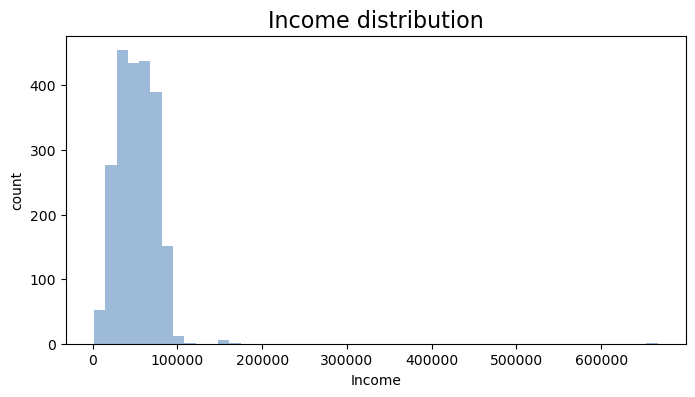

In [287]:
plt.figure(figsize=(8,4))
sns.distplot(df['Income'], kde=False, hist=True)
plt.title('Income distribution', size=16)
plt.ylabel('count')

<Axes: >

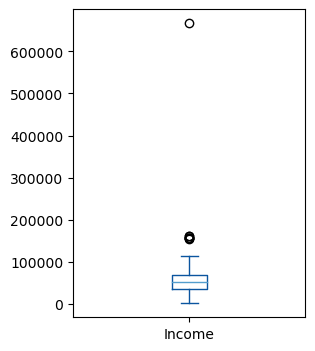

In [288]:
df['Income'].plot(kind='box', figsize=(3,4))

The dataset has sligly left skewed and a few outlier

We decide to use median imputation strategy

In [289]:
# Median imputation
df['Income'] = df['Income'].fillna(df['Income'].median())

## Outliers

Next, we are going to deal with outliers

Let's use **Box plot** to visualize the data

In [290]:
# Select only numeric data
df_numeric = df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)

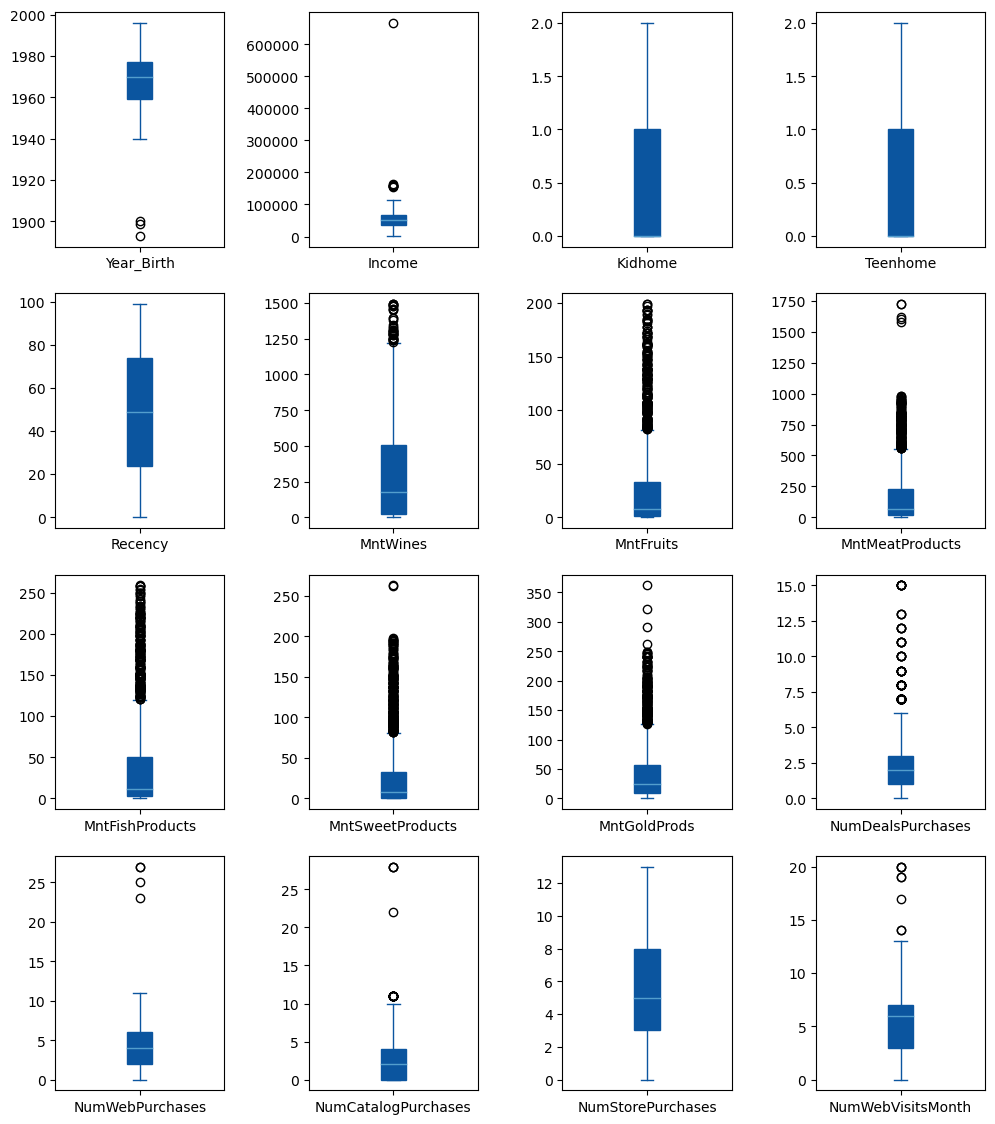

In [291]:
df_numeric.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5)

Droping row for people who born before 1900, hence it is low chances that people would lives longer than 123 years, this would be data entry error.

In [292]:
pd.value_counts(df['Year_Birth'] >= 1900)

Year_Birth
True     2238
False       2
Name: count, dtype: int64

<Axes: >

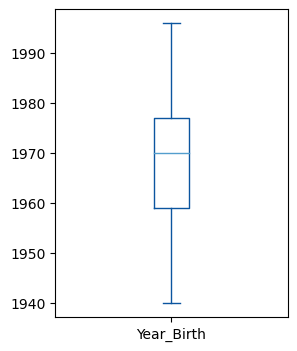

In [293]:
# Drop outlier and reset index
df = df[df['Year_Birth'] > 1900].reset_index(drop=True)

df['Year_Birth'].plot(kind='box', figsize=(3,4))

In [294]:
pd.value_counts(df['Income'] < 200000)

Income
True     2236
False       1
Name: count, dtype: int64

<Axes: >

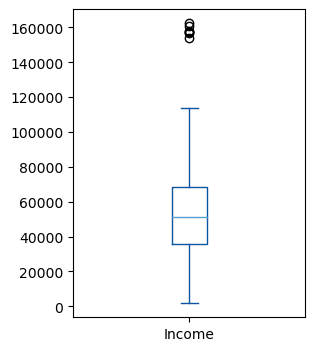

In [295]:
df = df[df['Income'] < 200000].reset_index(drop=True)

df['Income'].plot(kind='box', figsize=(3,4))

## Feature engineering

- Total dependents ('Dependents') from sum of Kidhome, Teenhome
- The year of becoming a customer ('Year_Customer') from 'Dt_Customer'
- Total amount spent ('TotalMnt')
- Total purchases ('TotalPurchases')
- Total of campaigns accepted ('TotalCampaignAccept')

For more than this, we might use all combination and see the correationship, then work backward to make assumption

In [296]:
# Total family member
df['Dependents'] = df['Kidhome'] + df['Teenhome']

# Year becoming a Customer
df['Year_Customer'] = pd.DatetimeIndex(df['Dt_Customer']).year

# Total Amount Spent
mnt_cols = [col for col in df.columns if 'Mnt' in col]
df['TotalMnt'] = df[mnt_cols].sum(axis=1)

# Total Purchases
purchases_cols = [col for col in df.columns if 'Purchases' in col]
df['TotalPurchases'] = df[purchases_cols].sum(axis=1)

# Total Campaigns Accepted
campaigns_cols = [col for col in df.columns if 'Cmp' in col] + ['Response']
df['TotalCampaignsAccept'] = df[campaigns_cols].sum(axis=1)

# Take a look at new features, by customer ID
df[['ID', 'Dependents', 'Year_Customer', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAccept']].head()

,ID,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAccept
0,1826,0,2014,1190,15,1
1,1,0,2014,577,18,2
2,10476,1,2014,251,11,0
3,1386,2,2014,11,4,0
4,5371,1,2014,91,8,2


Plot a matrix dataset as a hierarchically-clustered heatmap.



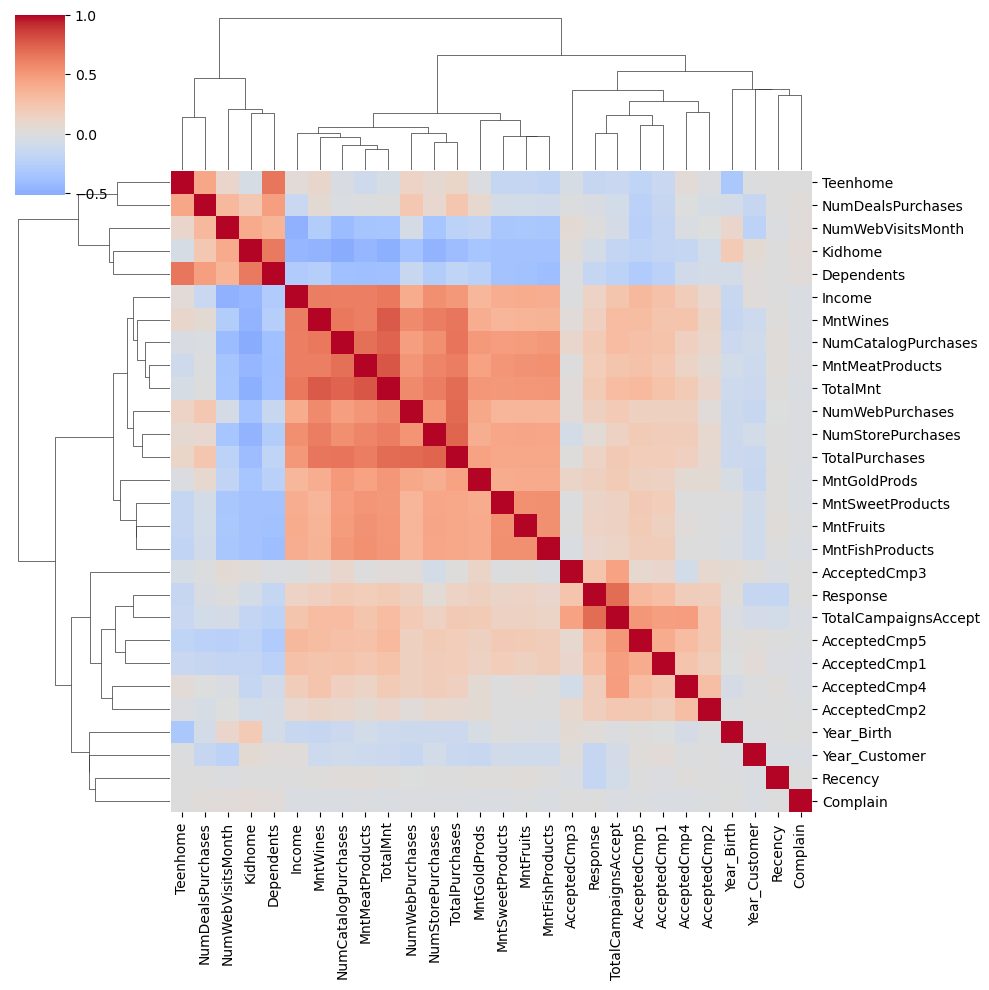

In [297]:
corrs = df.drop(columns='ID').select_dtypes(include=np.number).corr(method='kendall')

sns.clustermap(corrs, cmap='coolwarm', center=0)

## Reading the plot

Patterns \
You will see 3 regtangle represent 3 cluster, and you could use correlation inside the cluster
- **Teen and Kid at home cluster** correlate with NumDealsPurchases, NumWebVisitsMonth
  - Slightly negative correlation with NumCataloguePurchases, and TotalMnt
- **High Income cluster*** correlate with Mnt, NumCataloguePurchases, NumWebPurchases, NumStorePurchases, TotalPurchases
- **Campaign cluster** CampaignAccepted correlate with Response itself
  - Slightly positive correlation with TotalMnt

Abnomalies
- NumWebVisitsMonth does not correlate with NumWebPurchases

#### Let's focus on our objective
- TotalMnt
- TotalCampaignsAccept

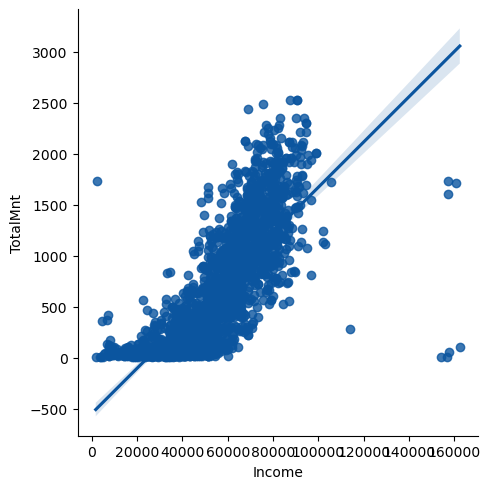

In [298]:
sns.lmplot(data=df, x='Income', y='TotalMnt')

<Axes: xlabel='Dependents', ylabel='TotalMnt'>

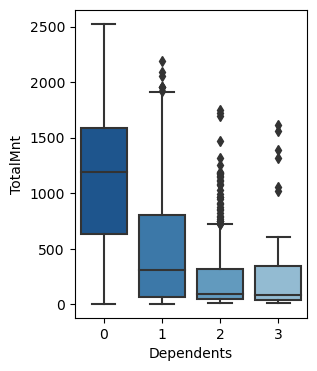

In [299]:
plt.figure(figsize=(3,4))
sns.boxplot(x='Dependents', y='TotalMnt', data=df)

<Axes: xlabel='Dependents', ylabel='NumDealsPurchases'>

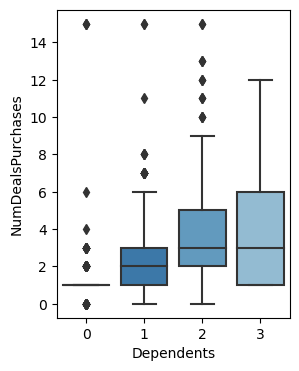

In [300]:
plt.figure(figsize=(3,4))
sns.boxplot(x='Dependents', y='NumDealsPurchases', data=df)

<Axes: xlabel='TotalCampaignsAccept', ylabel='Income'>

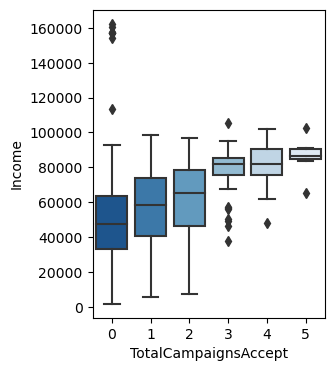

In [301]:
plt.figure(figsize=(3,4))
sns.boxplot(x='TotalCampaignsAccept', y='Income', data=df)

<Axes: xlabel='TotalCampaignsAccept', ylabel='Dependents'>

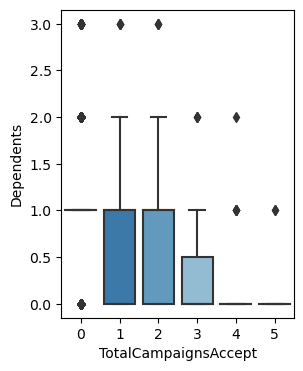

In [302]:
plt.figure(figsize=(3,4))
sns.boxplot(x='TotalCampaignsAccept', y='Dependents', data=df)

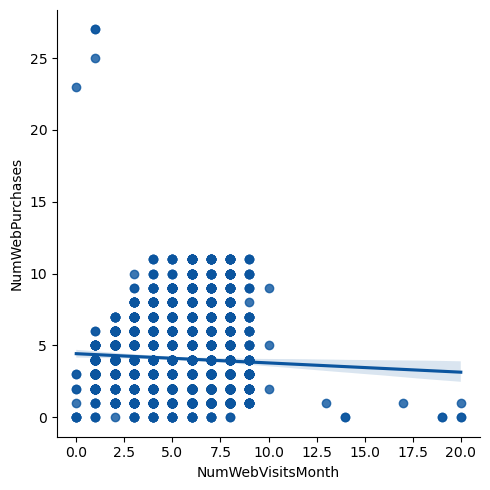

In [303]:
sns.lmplot(data=df, x='NumWebVisitsMonth', y='NumWebPurchases')

# Statistical Analysis

In [305]:
df['NumStorePurchases'].value_counts().sort_index()

NumStorePurchases
0      15
1       7
2     221
3     489
4     322
5     212
6     178
7     143
8     149
9     106
10    125
11     81
12    105
13     83
Name: count, dtype: int64

/var/folders/3t/xfpgj4cx36x99cwhqh55n25w0000gp/T/ipykernel_5742/3488727158.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['NumStorePurchases'], kde=False, hist=True, bins=12)


Text(0, 0.5, 'count')

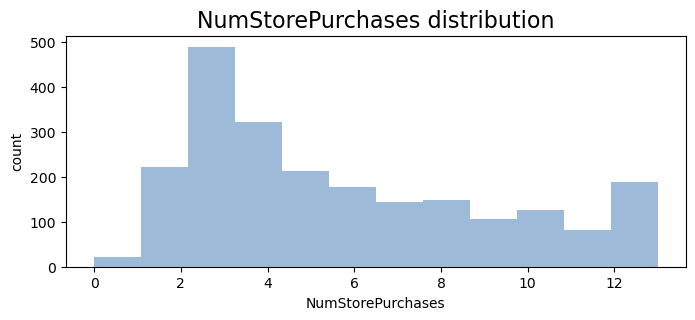

In [306]:
plt.figure(figsize=(8,3))
sns.distplot(df['NumStorePurchases'], kde=False, hist=True, bins=12)
plt.title('NumStorePurchases distribution', size=16)
plt.ylabel('count')